In [30]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt 
%matplotlib inline

In [68]:
def symb(symbol):
    data=yf.download(f'{symbol}')
    data.drop(columns='Volume',axis=0,inplace=True)
    data.to_parquet(f'{symbol}.parquet')
    data_new=pd.read_parquet(f'{symbol}.parquet')
    return(data_new)


In [69]:

df=symb('AUDCAD=X')

[*********************100%%**********************]  1 of 1 completed


In [70]:
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2003-12-01,0.939950,0.949650,0.93789,0.948880,0.948880
2003-12-02,0.948270,0.952230,0.94705,0.949270,0.949270
2003-12-03,0.949240,0.958940,0.94651,0.958220,0.958220
2003-12-04,0.958120,0.966070,0.95597,0.963950,0.963950
2003-12-05,0.964420,0.964900,0.95628,0.959880,0.959880
...,...,...,...,...,...
2024-02-08,0.877754,0.878541,0.87260,0.877754,0.877754
2024-02-09,0.874540,0.878323,0.87290,0.874540,0.874540
2024-02-12,0.877966,0.878890,0.87660,0.877966,0.877966


In [71]:
df['first']=df.Close.pct_change()

In [72]:
#Moving Average
df['moving_average']=df['Adj Close'].rolling(5).mean()
df['moving_std_dev']=df['Adj Close'].rolling(5).std()
df.tail(5)

,Open,High,Low,Close,Adj Close,first,moving_average,moving_std_dev
Date,,,,,,,,
2024-02-08,0.877754,0.878541,0.87260,0.877754,0.877754,-0.002892,0.878212,0.001610
2024-02-09,0.874540,0.878323,0.87290,0.874540,0.874540,-0.003662,0.877260,0.002129
2024-02-12,0.877966,0.878890,0.87660,0.877966,0.877966,0.003918,0.877618,0.002050
2024-02-13,0.878450,0.878685,0.87382,0.877900,0.877900,-0.000075,0.877692,0.002053
2024-02-14,0.875425,0.879350,0.87460,0.875425,0.875425,-0.002819,0.876717,0.001616


In [73]:
#compute the moving average 
df['upper_band']=df.moving_average +1*df['moving_std_dev']
df['lower_band']=df.moving_average +1*df['moving_std_dev']

In [74]:
df[['moving_average']]

,moving_average
Date,
2003-12-01,NaN
2003-12-02,NaN
2003-12-03,NaN
2003-12-04,NaN
2003-12-05,0.956040
...,...
2024-02-08,0.878212
2024-02-09,0.877260
2024-02-12,0.877618


In [75]:
#perform the ADF Test
from statsmodels.tsa.stattools import adfuller
#help(adfuller)

In [76]:
adf=adfuller(df.Close,maxlag=1)

In [77]:
adf

(-3.167259132513752,
 0.021959805540239217,
 1,
 5262,
 {'1%': -3.431593347189396,
  '5%': -2.862089431030616,
  '10%': -2.567062461768803},
 -39736.92239821528)

In [78]:
#critical value
adf[4]
#since adf[0] <adf 5% we can say that with 95%confidense that the price is stationary

{'1%': -3.431593347189396, '5%': -2.862089431030616, '10%': -2.567062461768803}

<Axes: xlabel='Date'>

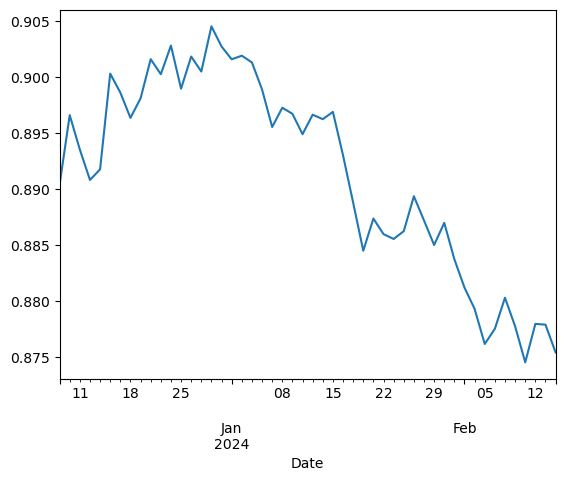

In [79]:
df['Close'].iloc[-50:].plot()

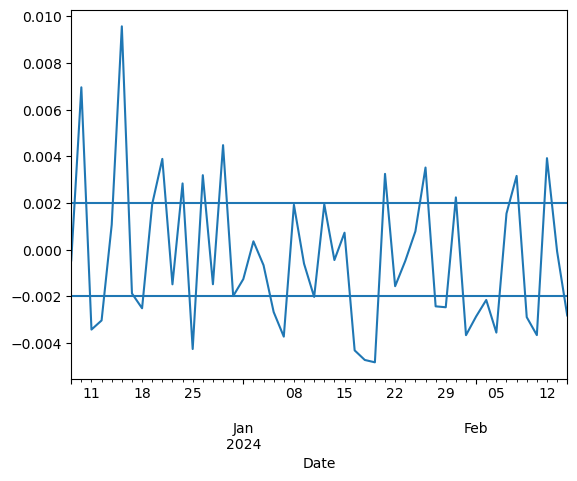

In [80]:
df['first'].iloc[-50:].plot()
plt.axhline(y=-0.002)
plt.axhline(y=0.002)

In [81]:
df['long_entry']=df.Close<df.lower_band
df['long_exit']=df.Close>=df.moving_average

In [82]:
df.head(20)

,Open,High,Low,Close,Adj Close,first,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit
Date,,,,,,,,,,,,
2003-12-01,0.93995,0.94965,0.93789,0.94888,0.94888,NaN,NaN,NaN,NaN,NaN,False,False
2003-12-02,0.94827,0.95223,0.94705,0.94927,0.94927,0.000411,NaN,NaN,NaN,NaN,False,False
2003-12-03,0.94924,0.95894,0.94651,0.95822,0.95822,0.009428,NaN,NaN,NaN,NaN,False,False
2003-12-04,0.95812,0.96607,0.95597,0.96395,0.96395,0.005980,NaN,NaN,NaN,NaN,False,False
2003-12-05,0.96442,0.96490,0.95628,0.95988,0.95988,-0.004222,0.956040,0.006693,0.962733,0.962733,True,True
2003-12-08,0.96002,0.96570,0.95845,0.96000,0.96000,0.000125,0.958264,0.005451,0.963715,0.963715,True,True
2003-12-09,0.96029,0.97101,0.95687,0.96718,0.96718,0.007479,0.961846,0.003650,0.965496,0.965496,False,True
2003-12-10,0.96715,0.97046,0.96363,0.96670,0.96670,-0.000496,0.963542,0.003512,0.967054,0.967054,True,True
2003-12-11,0.96685,0.97792,0.96026,0.97414,0.97414,0.007696,0.965580,0.005931,0.971511,0.971511,False,True


In [83]:
df['position_long']=np.nan 
df.loc[df.long_entry,'position_long']=1
df.loc[df.long_exit,'position_long']=0

<IPython.core.display.Javascript object>

In [84]:
#forward fill
df.position_long=df.position_long.fillna(method='ffill')

In [85]:
df

,Open,High,Low,Close,Adj Close,first,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,position_long
Date,,,,,,,,,,,,,
2003-12-01,0.939950,0.949650,0.93789,0.948880,0.948880,NaN,NaN,NaN,NaN,NaN,False,False,NaN
2003-12-02,0.948270,0.952230,0.94705,0.949270,0.949270,0.000411,NaN,NaN,NaN,NaN,False,False,NaN
2003-12-03,0.949240,0.958940,0.94651,0.958220,0.958220,0.009428,NaN,NaN,NaN,NaN,False,False,NaN
2003-12-04,0.958120,0.966070,0.95597,0.963950,0.963950,0.005980,NaN,NaN,NaN,NaN,False,False,NaN
2003-12-05,0.964420,0.964900,0.95628,0.959880,0.959880,-0.004222,0.956040,0.006693,0.962733,0.962733,True,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08,0.877754,0.878541,0.87260,0.877754,0.877754,-0.002892,0.878212,0.001610,0.879822,0.879822,True,False,1.0
2024-02-09,0.874540,0.878323,0.87290,0.874540,0.874540,-0.003662,0.877260,0.002129,0.879389,0.879389,True,False,1.0
2024-02-12,0.877966,0.878890,0.87660,0.877966,0.877966,0.003918,0.877618,0.002050,0.879668,0.879668,True,True,0.0


In [86]:
df['short_entry']=df.Close>df.upper_band
df['short_exit']=df.Close<=df.moving_average
df['position_short']=np.nan
df.loc[df.short_entry,'positions_short']=-1
df.loc[df.short_exit,'positions_short']=0
df.positions_short=df.positions_short.fillna(method='ffill')

<IPython.core.display.Javascript object>

In [87]:
df.head()

,Open,High,Low,Close,Adj Close,first,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,position_long,short_entry,short_exit,position_short,positions_short
Date,,,,,,,,,,,,,,,,,
2003-12-01,0.93995,0.94965,0.93789,0.94888,0.94888,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
2003-12-02,0.94827,0.95223,0.94705,0.94927,0.94927,0.000411,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
2003-12-03,0.94924,0.95894,0.94651,0.95822,0.95822,0.009428,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
2003-12-04,0.95812,0.96607,0.95597,0.96395,0.96395,0.005980,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
2003-12-05,0.96442,0.96490,0.95628,0.95988,0.95988,-0.004222,0.95604,0.006693,0.962733,0.962733,True,True,0.0,False,False,NaN,NaN


In [88]:
df['positions']=df.position_long +df.positions_short

In [89]:
df['prices_difference']=df.Close-df.Close.shift(1)
df['pnl']=df.positions.shift(1)*df.prices_difference
df['cumpnl']=df.pnl.cumsum()

<Axes: xlabel='Date'>

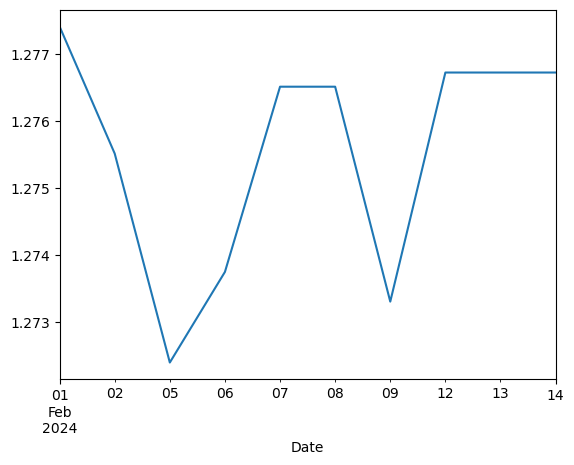

In [90]:
df['cumpnl'].iloc[-10:].plot()

In [91]:
import statsmodels.api as sm

In [93]:
EWA=symb('EWA')
EWC=symb('EWC')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [96]:
x=EWA['Adj Close']
y=EWC['Adj Close']

In [112]:
dfc=pd.concat([y,x],axis=1)
dfc.columns=['EWC','EWA']

In [113]:
dfc

,EWC,EWA
Date,,
1996-03-18,4.540507,3.217717
1996-03-19,4.568027,3.257938
1996-03-20,4.568027,3.257938
1996-03-21,4.568027,3.298160
1996-03-22,4.568027,3.298160
...,...,...
2024-02-09,36.340000,23.650000
2024-02-12,36.450001,23.629999
2024-02-13,35.290001,22.980000


**Find Hedge Ratio**

In [114]:
import statsmodels.api as sm
model=sm.OLS(dfc.EWC.iloc[:90],dfc.EWA.iloc[:90])
model=model.fit()
model.params[0]#slope of the line 

1.397950621345159

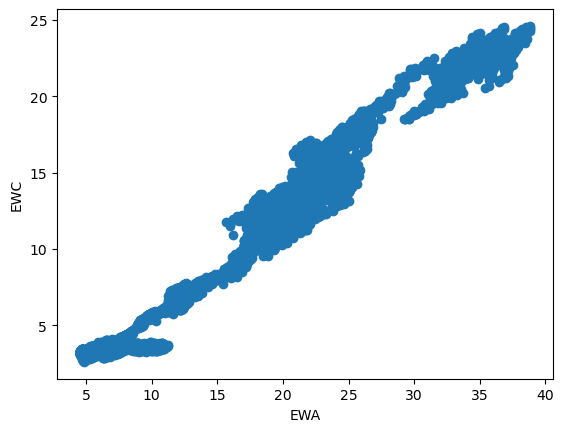

In [115]:
plt.scatter(dfc.EWC,dfc.EWA)
plt.xlabel('EWA')
plt.ylabel('EWC')
plt.show()


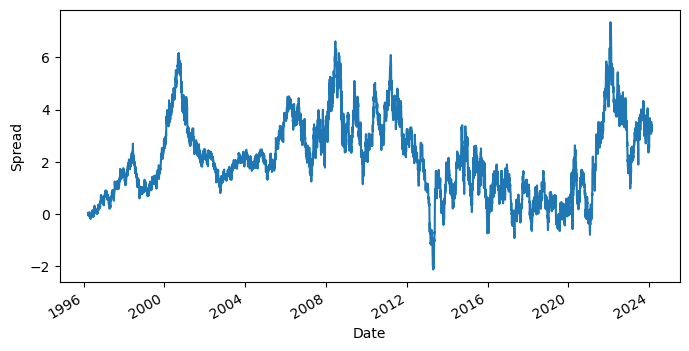

In [116]:
dfc['spread']=dfc.EWC -model.params[0]*dfc.EWA
dfc.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

In [117]:
adfu=adfuller(dfc.spread,maxlag=1)


In [118]:
adfu[0]

-4.29420757755676

In [119]:
adfu[4]

{'1%': -3.43128120157662, '5%': -2.8619515165147282, '10%': -2.566989046243082}

In [120]:
#adfu[0]<adfu[4]
#means we can say we 95% confidense that the graph is stationary in nature

In [124]:
dfc['moving_average']=dfc.spread.rolling(30).mean()
dfc['moving_std_dev']=dfc.spread.rolling(30).std()
dfc.tail(8)

,EWC,EWA,spread,moving_average,moving_std_dev
Date,,,,,
2024-02-06,36.110001,23.629999,3.076429,3.147370,0.349822
2024-02-07,36.209999,23.549999,3.288263,3.172190,0.331444
2024-02-08,36.200001,23.520000,3.320202,3.194060,0.318141
2024-02-09,36.340000,23.650000,3.278468,3.218798,0.293102
2024-02-12,36.450001,23.629999,3.416429,3.250539,0.258027
2024-02-13,35.290001,22.980000,3.165096,3.267580,0.232923
2024-02-14,35.919998,23.370001,3.249891,3.291260,0.188160
2024-02-15,36.700001,23.750000,3.498674,3.315583,0.163920


In [125]:
dfc['upper_band']=dfc.moving_average + 2*dfc.moving_std_dev
dfc['lower_band']=dfc.moving_average + 2*dfc.moving_std_dev

In [126]:
dfc['long_entry']=dfc.spread<dfc.lower_band
dfc['long_exit']=dfc.spread>=dfc.moving_average
dfc['positions_long']=np.nan
dfc.loc[dfc.long_entry,'positions_long']=1
dfc.loc[dfc.long_exit,'positions_long']=0
dfc.positions_long=dfc.positions_long.fillna(method='ffill')


<IPython.core.display.Javascript object>

In [128]:
dfc['short_entry']=dfc.spread>dfc.upper_band
dfc['short_exit']=dfc.spread<=dfc.moving_average
dfc['positions_short']=np.nan
dfc.loc[dfc.short_entry,'positions_short']=-1
dfc.loc[dfc.short_exit,'positions_short']=0
dfc.positions_short=dfc.positions_short.fillna(method='ffill')

<IPython.core.display.Javascript object>

In [129]:
dfc['positions']=dfc.positions_long + dfc.positions_short

In [130]:
dfc

,EWC,EWA,spread,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,positions_long,short_entry,short_exit,positions_short,positions
Date,,,,,,,,,,,,,,
1996-03-18,4.540507,3.217717,0.042297,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
1996-03-19,4.568027,3.257938,0.013590,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
1996-03-20,4.568027,3.257938,0.013590,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
1996-03-21,4.568027,3.298160,-0.042638,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
1996-03-22,4.568027,3.298160,-0.042638,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09,36.340000,23.650000,3.278468,3.218798,0.293102,3.805002,3.805002,True,True,0.0,False,False,0.0,0.0
2024-02-12,36.450001,23.629999,3.416429,3.250539,0.258027,3.766593,3.766593,True,True,0.0,False,False,0.0,0.0
2024-02-13,35.290001,22.980000,3.165096,3.267580,0.232923,3.733427,3.733427,True,False,1.0,False,True,0.0,1.0


In [131]:
dfc['spread_difference']=dfc.spread-dfc.spread.shift(1)
dfc['pnl']=dfc.positions.shift(1)*dfc.spread_difference
dfc['cumpnl']=dfc.pnl.cumsum()

In [132]:
dfc

,EWC,EWA,spread,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,positions_long,short_entry,short_exit,positions_short,positions,spread_difference,pnl,cumpnl
Date,,,,,,,,,,,,,,,,,
1996-03-18,4.540507,3.217717,0.042297,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN
1996-03-19,4.568027,3.257938,0.013590,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,-0.028708,NaN,NaN
1996-03-20,4.568027,3.257938,0.013590,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,0.000000,NaN,NaN
1996-03-21,4.568027,3.298160,-0.042638,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,-0.056228,NaN,NaN
1996-03-22,4.568027,3.298160,-0.042638,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09,36.340000,23.650000,3.278468,3.218798,0.293102,3.805002,3.805002,True,True,0.0,False,False,0.0,0.0,-0.041733,-0.000000,62.274616
2024-02-12,36.450001,23.629999,3.416429,3.250539,0.258027,3.766593,3.766593,True,True,0.0,False,False,0.0,0.0,0.137960,0.000000,62.274616
2024-02-13,35.290001,22.980000,3.165096,3.267580,0.232923,3.733427,3.733427,True,False,1.0,False,True,0.0,1.0,-0.251332,-0.000000,62.274616


<Axes: xlabel='Date'>

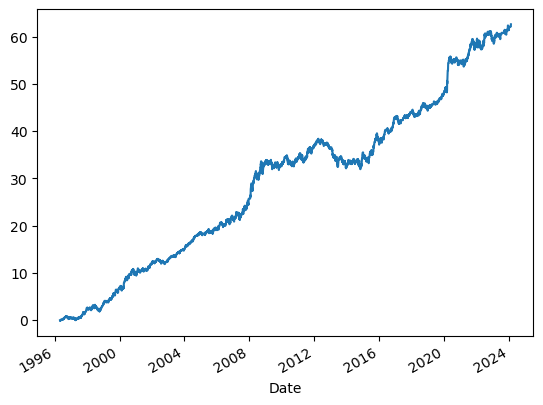

In [133]:
dfc['cumpnl'].plot()